# Atlanta Crime - Supervised Learning

## Description
In this part of the project, we will use supervised learning algorithms, namely, Decision Trees, Random Forests, NBC, SVM, and Logistic Regression algorithms to predict crime score for a given location and time.

## Import Packages

In [565]:
import pandas as pd

# from sklearn.tree import plot_tree
# from sklearn.tree.export import export_text
# from sklearn.model_selection import train_test_split # Import train_test_split function

# Preprocessing, Metrics
from sklearn import preprocessing
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Classifiers, Regressions for DT, RF, NB, SV, LogReg, LinReg
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

# Other imports
import datetime
import random
import numpy as np
import time
import matplotlib.pyplot as plt

## Load in Data

In [164]:
# data = pd.read_csv("data/examples/cobra_example_10.csv") #, sep=',', header=0, engine='python', usecols = lambda column : column in ["Neighborhood", "Month", "Day", "Shift"])
data = pd.read_csv("cobra-generalized.csv")
training_data = pd.read_csv("cobra-clean2009.csv", sep=',', header=0, usecols = lambda column : column in ["Occur Time", "Neighborhood", "Shift Occurrence", "Day of Week", "Crime Category"])

data['Crime Score'] = 1000 * data['Category 1'] + 100 * data['Category 2'] + 10 * data['Category 3'] + 1 * data['Category 4']
data = data.drop(["Categories", "Category 1", "Category 2", "Category 3", "Category 4"], 1)

# Shuffle, for now, until 2019 CSV is available
# (Might need) df = df.sample(frac=1).reset_index(drop=True)
training_data = training_data.sample(frac=1)
# training_data.head()

data = data.sample(frac=1)
data.head()

,Neighborhood,Month,Day,Shift,Crime Score
35027,Peachtree Heights East,12,6,Evening,0
17479,East Lake,5,2,Day,32
47585,West Paces Ferry/Northside,10,6,Evening,13
32850,Oakcliff,5,2,Morning,0
25932,Just Us,11,6,Morning,0


In [165]:
# For now, test data is the latter 10% of training data (after shuffling)

# test_data = training_data[int(0.10 * len(training_data)):]
# training_data = training_data[:int(0.10 * len(training_data))]

test_data = pd.read_csv("cobra-clean2019.csv", sep=',', header=0, usecols = lambda column : column in ["Occur Time", "Neighborhood", "Shift Occurrence", "Day of Week", "Crime Category"])

# test_data.head()

# data2 = data[int(0.10 * len(data)):]
# data = data[:int(0.10 * len(data))]

data2 = pd.read_csv("cobra-generalized-2019.csv")
data2.head()

,Neighborhood,Month,Day,Shift,Crime Score
47289,West Manor,8,6,Morning,0
32800,Oakcliff,2,6,Day,0
14851,Collier Hills,12,1,Day,1
34409,Paces,7,3,Evening,2
15425,Cross Creek,3,3,Evening,20


### Transforming the data

In [166]:
le = preprocessing.LabelEncoder()
le.fit(training_data["Neighborhood"])
training_data["Neighborhood"] = le.transform(training_data["Neighborhood"])
le.fit(training_data["Shift Occurrence"])
training_data["Shift Occurrence"] = le.transform(training_data["Shift Occurrence"])

# training_data.head()

le = preprocessing.LabelEncoder()
le.fit(data["Neighborhood"])
data["Neighborhood"] = le.transform(data["Neighborhood"])
le.fit(data["Shift"])
data["Shift"] = le.transform(data["Shift"])

data.head()

,Neighborhood,Month,Day,Shift,Crime Score
35027,138,12,6,1,0
17479,69,5,2,0,32
47585,188,10,6,1,13
32850,130,5,2,2,0
25932,102,11,6,2,0


In [167]:
le = preprocessing.LabelEncoder()
le.fit(test_data["Neighborhood"])
test_data["Neighborhood"] = le.transform(test_data["Neighborhood"])
le.fit(test_data["Shift Occurrence"])
test_data["Shift Occurrence"] = le.transform(test_data["Shift Occurrence"])

# test_data.head()

le = preprocessing.LabelEncoder()
le.fit(data2["Neighborhood"])
data2["Neighborhood"] = le.transform(data2["Neighborhood"])
le.fit(data2["Shift"])
data2["Shift"] = le.transform(data2["Shift"])

data2.head()

,Neighborhood,Month,Day,Shift,Crime Score
47289,187,8,6,2,0
32800,130,2,6,0,0
14851,58,12,1,0,1
34409,136,7,3,1,2
15425,61,3,3,1,20


## Metrics & Plots

### Splitting data into training and test features and labels: X is features, y is label

In [169]:
# Reading data & split into training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
# Geeksforgeeks: "random_state" variable is a pseudo-random number generator state used for random sampling

# We need the cobra-clean for 2019 to use for the test data
X_train = training_data.drop(['Crime Category'], 1)
y_train = training_data['Crime Category']
X_test = test_data.drop(['Crime Category'], 1)
y_test = test_data['Crime Category']

X_train2 = data.drop(['Crime Score'], 1)
y_train2 = data['Crime Score']
X_test2 = data2.drop(['Crime Score'], 1)
y_test2 = data2['Crime Score']

In [578]:
def model_fitting(X_train, y_train, X_test, model, classOrReg):
    start_time = time.time()
    # Model Definition & Fitting
    if model == "dt":
        if classOrReg == "class":
            fitter = DecisionTreeClassifier()
        else:
            fitter = DecisionTreeRegressor()
    elif model == "rf":
        if classOrReg == "class":
            fitter = RandomForestClassifier(n_estimators=100)
        else:
            fitter = RandomForestRegressor(n_estimators=100)
    elif model == "nb":
        if classOrReg == "class":
            fitter = GaussianNB()
        else:
            fitter = BayesianRidge()
    elif model == "sv":
        if classOrReg == "class":
            fitter = SVC()
        else:
            fitter = SVR()
    elif model == "logreg":
        fitter = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10000)
    elif model == "linreg":
        fitter = LinearRegression()
    else:
        print("Unrecognized model", model)
        return
    fitter = fitter.fit(X_train, y_train)
    end_time = time.time()
    # Predict based on the given features for the test set
    y_pred = fitter.predict(X_test)
    """
    if model == "linreg":
        predictions_probability = fitter.coef_
    else:
        predictions_probability = fitter.predict_proba(X_test)
    """
    return (fitter, y_pred, end_time - start_time)

## Models, Definition & Fitting

### Decision Tree Models

In [569]:
# Category classification
dt_clf, dt_y_pred, dt_elapsed_time = model_fitting(X_train, y_train, X_test, "dt", "class")

In [570]:
# Crime score regression
dt_clf2, dt_y_pred2, dt_elapsed_time2 = model_fitting(X_train2, y_train2, X_test2, "dt", "regress")

### Random Forest Models

In [571]:
# Category classification
rf_clf, rf_y_pred, rf_elapsed_time = model_fitting(X_train, y_train, X_test, "rf", "class")

In [572]:
rf_clf2, rf_y_pred2, rf_elapsed_time2 = model_fitting(X_train2, y_train2, X_test2, "rf", "regress")

### NBC Models

In [574]:
# Category classification
nbc_clf, nbc_y_pred, nbc_elapsed_time = model_fitting(X_train, y_train, X_test, "nb", "class")

In [575]:
nbc_clf2, nbc_y_pred2, nbc_elapsed_time2 = model_fitting(X_train2, y_train2, X_test2, "nb", "regress")

### SVM Models

In [576]:
# Category classification
svm_clf, svm_y_pred, svm_elapsed_time = model_fitting(X_train, y_train, X_test, "sv", "class")

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [579]:
# IGNORE: Crime score classification
svm_clf2, svm_y_pred2, svm_elapsed_time2 = model_fitting(X_train2, y_train2, X_test2, "sv", "regress")

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Logistic Regressions

In [580]:
logreg_clf, logreg_y_pred, logreg_elapsed_time = model_fitting(X_train, y_train, X_test, "logreg", "class")

In [588]:
np.around(logreg_y_pred)
logreg_y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [581]:
logreg_clf2, logreg_y_pred2, logreg_elapsed_time2 = model_fitting(X_train2, y_train2, X_test2, "logreg", "regress")

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Linear Regressions

In [582]:
# IGNORE: Category classification
linreg_clf, linreg_y_pred, linreg_elapsed_time = model_fitting(X_train, y_train, X_test, "linreg", "class")

In [590]:
np.around(linreg_y_pred)

array([3., 3., 3., ..., 3., 3., 3.])

In [583]:
# Crime score classification
linreg_clf2, linreg_y_pred2, linreg_elapsed_time2 = model_fitting(X_train2, y_train2, X_test2, "linreg", "regress")

In [584]:
print(linreg_elapsed_time, linreg_elapsed_time2)
linreg_y_pred_rounded = np.around(linreg_y_pred)
print("accuracy_score", metrics.accuracy_score(y_test, linreg_y_pred_rounded))
print("precision_score", metrics.precision_score(y_test, linreg_y_pred_rounded, average=None))
print("recall_score", metrics.recall_score(y_test, linreg_y_pred_rounded, average=None))

print("RMSE linreg_y_pred", np.sqrt(np.sum(np.square(np.subtract(y_test, linreg_y_pred))) / len(y_test)))
print()

print("RMSE linreg_y_pred_rounded", np.sqrt(np.sum(np.square(np.subtract(y_test, linreg_y_pred_rounded))) / len(y_test)))
print()


print("Accuracy range")
for i in [0, 1, 5, 10, 25, 100]:
    print(i, np.sum(np.absolute(y_test2 - linreg_y_pred2) <= i) / len(y_test2))

0.0061969757080078125 0.0037767887115478516
accuracy_score 0.3341300044501051
precision_score [0.         0.         0.31236591 0.60047738]
recall_score [0.         0.         0.9297784  0.08234671]
RMSE linreg_y_pred 0.7226148422684304

RMSE linreg_y_pred_rounded 0.8363284470706984

Accuracy range
0 0.0
1 0.005864197530864198
5 0.03064373897707231
10 0.05958994708994709
25 0.11849647266313933
100 0.3648148148148148


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Plots

[7.19099045e-02 2.85943198e+00 9.69791412e-03 2.92628637e+02
 1.26097319e+01 6.19697571e-03]
[1.22821331e-02 7.54997015e-01 3.05910110e-02 1.10979104e+00
 9.49273593e+02 3.77678871e-03]


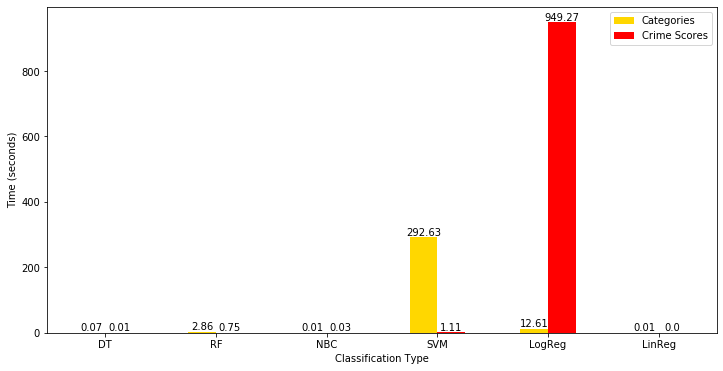

In [585]:
times = np.array([dt_elapsed_time, rf_elapsed_time, nbc_elapsed_time, svm_elapsed_time, logreg_elapsed_time, linreg_elapsed_time])
# times = np.log(times)
# times = times - min(times)
times2 = np.array([dt_elapsed_time2, rf_elapsed_time2, nbc_elapsed_time2, svm_elapsed_time2, logreg_elapsed_time2, linreg_elapsed_time2])
# times2 = np.log(times2)
# times2 = times2 - min(times2)

plt.figure(figsize=(12, 6))
plt.bar([i - 0.125 for i in range(len(times))], times, width=0.25, color="gold")
for i in range(len(times)):
    plt.text(i - 0.125, times[i], round(times[i], 2), va='bottom', ha='center')
plt.bar([i + 0.125 for i in range(len(times2))], times2, width=0.25, color="red")
for i in range(len(times2)):
    plt.text(i + 0.125, times2[i], round(times2[i], 2), va='bottom', ha='center')


plt.xticks([i for i in range(len(times))], ["DT", "RF", "NBC", "SVM", "LogReg", "LinReg"])
plt.legend(["Categories", "Crime Scores"])
plt.xlabel("Classification Type")
plt.ylabel("Time (seconds)")

plt.savefig('images/Supervised_Algs/times.png')
plt.show()

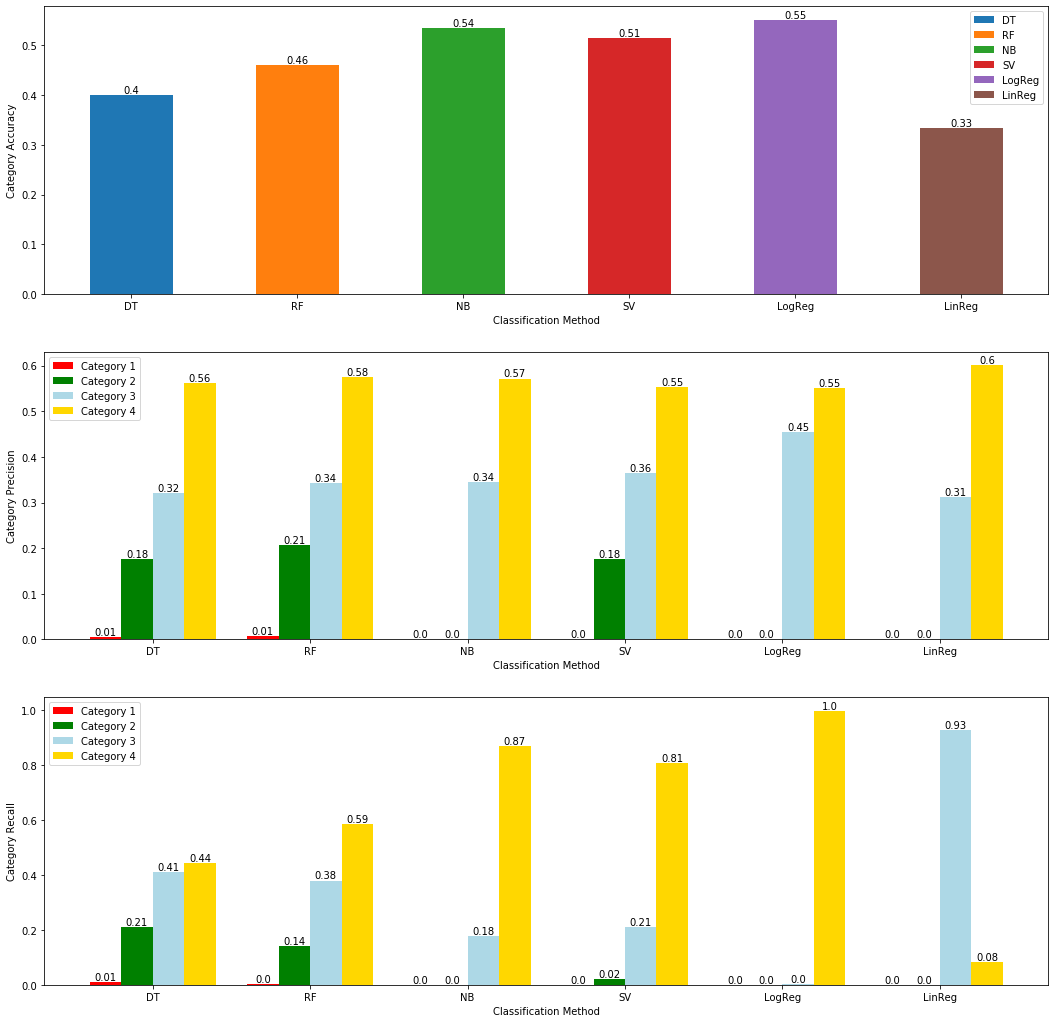

In [630]:
def apr(y_test, y_pred):
    # print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    # print("Precision (average=None):", metrics.precision_score(y_test, y_pred, average=None))
    # print("Recall (average=None):", metrics.recall_score(y_test, y_pred, average=None))
    # print()
    return metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, average=None), metrics.recall_score(y_test, y_pred, average=None)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,18))
for i, y_pred in enumerate([dt_y_pred, rf_y_pred, nbc_y_pred, svm_y_pred, logreg_y_pred, np.around(linreg_y_pred)]):
    acc_prec_rec = apr(y_test, y_pred)

    ax1.bar(i, acc_prec_rec[0], width=0.5)
    ax1.text(i, acc_prec_rec[0], round(acc_prec_rec[0], 2), va='bottom', ha='center')

    ax2.bar(2.5 * i - 0.75, acc_prec_rec[1][0], width=0.5, color="red")
    ax2.text(2.5 * i - 0.75, acc_prec_rec[1][0], round(acc_prec_rec[1][0], 2), va='bottom', ha='center')
    ax2.bar(2.5 * i - 0.25, acc_prec_rec[1][1], width=0.5, color="green")
    ax2.text(2.5 * i - 0.25, acc_prec_rec[1][1], round(acc_prec_rec[1][1], 2), va='bottom', ha='center')
    ax2.bar(2.5 * i + 0.25, acc_prec_rec[1][2], width=0.5, color="lightblue")
    ax2.text(2.5 * i + 0.25, acc_prec_rec[1][2], round(acc_prec_rec[1][2], 2), va='bottom', ha='center')
    ax2.bar(2.5 * i + 0.75, acc_prec_rec[1][3], width=0.5, color="gold")
    ax2.text(2.5 * i + 0.75, acc_prec_rec[1][3], round(acc_prec_rec[1][3], 2), va='bottom', ha='center')

    ax3.bar(2.5 * i - 0.75, acc_prec_rec[2][0], width=0.5, color="red")
    ax3.text(2.5 * i - 0.75, acc_prec_rec[2][0], round(acc_prec_rec[2][0], 2), va='bottom', ha='center')
    ax3.bar(2.5 * i - 0.25, acc_prec_rec[2][1], width=0.5, color="green")
    ax3.text(2.5 * i - 0.25, acc_prec_rec[2][1], round(acc_prec_rec[2][1], 2), va='bottom', ha='center')
    ax3.bar(2.5 * i + 0.25, acc_prec_rec[2][2], width=0.5, color="lightblue")
    ax3.text(2.5 * i + 0.25, acc_prec_rec[2][2], round(acc_prec_rec[2][2], 2), va='bottom', ha='center')
    ax3.bar(2.5 * i + 0.75, acc_prec_rec[2][3], width=0.5, color="gold")
    ax3.text(2.5 * i + 0.75, acc_prec_rec[2][3], round(acc_prec_rec[2][3], 2), va='bottom', ha='center')

ax1.legend(["DT", "RF", "NB", "SV", "LogReg", "LinReg"])
plt.sca(ax1)
plt.xticks([j for j in range(i + 1)], ["DT", "RF", "NB", "SV", "LogReg", "LinReg"])
plt.xlabel("Classification Method")
plt.ylabel("Category Accuracy")

ax2.legend(["Category 1", "Category 2", "Category 3", "Category 4"])
plt.sca(ax2)
plt.xticks([j * 2.5 for j in range(i + 1)], ["DT", "RF", "NB", "SV", "LogReg", "LinReg"])
plt.xlabel("Classification Method")
plt.ylabel("Category Precision")

ax3.legend(["Category 1", "Category 2", "Category 3", "Category 4"])
plt.sca(ax3)
plt.xticks([j * 2.5 for j in range(i + 1)], ["DT", "RF", "NB", "SV", "LogReg", "LinReg"])
plt.xlabel("Classification Method")
plt.ylabel("Category Recall")

plt.savefig('images/Supervised_Algs/apr_categories.png')
plt.show()

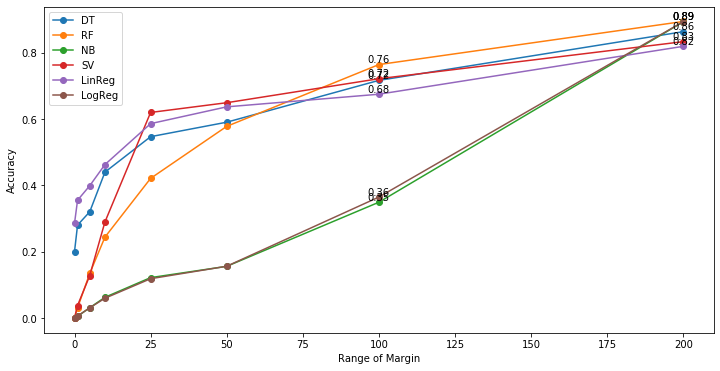

In [626]:
# Accuracy within range
def accuracy_range(y_test2, y_pred2, margin):
    return np.sum(np.absolute(y_test2 - y_pred2) <= margin) / len(y_test2)

plt.figure(figsize=(12, 6))
for y_pred2 in [dt_y_pred2, rf_y_pred2, nbc_y_pred2, svm_y_pred2, logreg_y_pred2, linreg_y_pred2]:
    ar_array = [accuracy_range(y_test2, y_pred2, margin) for margin in [0, 1, 5, 10, 25, 50, 100, 200]]
    ar_array_rounded = [round(ar, 2) for ar in ar_array]
    plt.plot([0, 1, 5, 10, 25, 50, 100, 200], ar_array, linestyle='-', marker='o')
    # plt.text(25, ar_array[4], ar_array_rounded[4], va='bottom', ha='center')
    # plt.text(50, ar_array[5], ar_array_rounded[5], va='bottom', ha='center')
    plt.text(100, ar_array[6], ar_array_rounded[6], va='bottom', ha='center')
    plt.text(200, ar_array[7], ar_array_rounded[7], va='bottom', ha='center')

plt.legend(["DT", "RF", "NB", "SV", "LinReg", "LogReg"])
plt.xlabel("Range of Margin")
plt.ylabel("Accuracy")

plt.savefig('images/Supervised_Algs/ar.png')
plt.show()

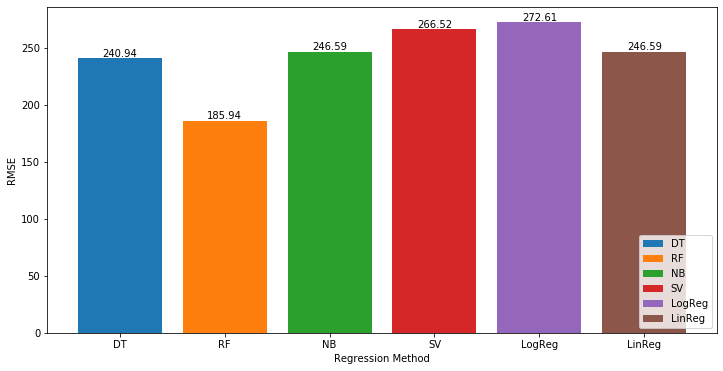

In [633]:
def rmse(pred, label):
    return np.sqrt(np.sum(np.square(np.subtract(pred, label))) / len(pred))

plt.figure(figsize=(12, 6))
for i, y_pred2 in enumerate([dt_y_pred2, rf_y_pred2, nbc_y_pred2, svm_y_pred2, logreg_y_pred2, linreg_y_pred2]):
    rmse_val = rmse(y_test2, y_pred2)
    plt.bar(i, rmse_val)
    plt.text(i, rmse_val, round(rmse_val, 2), va='bottom', ha='center')

plt.legend(["DT", "RF", "NB", "SV", "LogReg", "LinReg"], loc='lower right')
plt.xticks([j for j in range(i + 1)], ["DT", "RF", "NB", "SV", "LogReg", "LinReg"])
plt.xlabel("Regression Method")
plt.ylabel("RMSE")

plt.savefig('images/Supervised_Algs/rmse.png')
plt.show()